In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import random
import networkx as nx
import scipy.io as sio
import scipy.sparse as sp
import seaborn as sns
import matplotlib.colors as mcol
from tqdm import tqdm

from matplotlib import pyplot as plt
from helpers import (
    draw_edges, get_borderless_fig, pos_spring_layout, signed_layout, get_lcc, signed_normalized_laplacian, flatten,
    pos_adj, neg_adj, pos_graph
)
from viz_helpers import draw_query_result
from stat_helpers import populate_fields

In [3]:
plt.style.use('paper')
mycm = mcol.LinearSegmentedColormap.from_list("MyCmapName",["r", "w", "b"])

In [37]:
graph = 'bitcoin'
g = nx.read_gpickle('graphs/{}.pkl'.format(graph))
df = pd.read_pickle('outputs/{}_aug.pkl'.format(graph))

In [38]:
dg = nx.read_gpickle('graphs/{}_directed.pkl'.format(graph))

In [39]:
if graph == 'wikiconflict':
    target_query = 45353
elif graph == 'bitcoin':    
    target_query = 4551
r = df[(df['query'] == target_query) & (df['k'] == 200)].iloc[0]

In [40]:
C1, C2, q = r['C1'], r['C2'], r['query']
C = list(C1) + list(C2)

In [41]:
subg = dg.subgraph(C)  # use the directed graph
mapping = {n: i for i, n in enumerate(C)}
subg = nx.relabel_nodes(subg, mapping=mapping)
sub_A = nx.adj_matrix(subg, weight='sign')

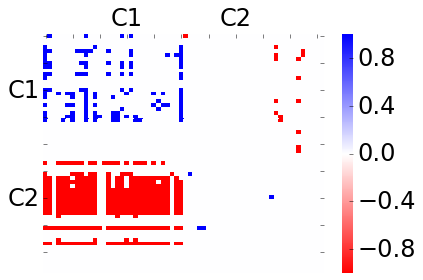

In [45]:
fig, ax = plt.subplots(1, 1)
hm = sns.heatmap(sub_A.A, cmap=mycm, ax=ax)
hm.set_yticklabels(['', '', 'C1', '', '', '', 'C2'])
hm.set_xticklabels(['', '', '', 'C1', '', '', '', 'C2'])
hm.xaxis.set_ticks_position('top')
fig.tight_layout()
fig.savefig('figs/case-study-common-negative-source.pdf')

(<matplotlib.figure.Figure at 0x7ff5d8a026d8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff5d8b86400>)

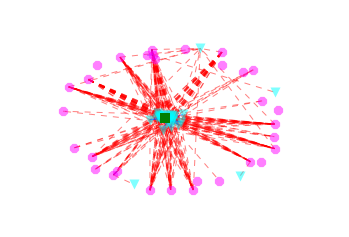

In [47]:
draw_query_result(g, C1, C2, seeds1=[q])